# Autoencoders

Los autoencoders son una forma de aprendizaje no supervisado que se utiliza para aprender representaciones eficientes de los datos. La idea es que el autoencoder aprenda a codificar los datos de entrada en una representación más compacta y luego decodificarlos de nuevo a su forma original.


In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt


(60000, 28, 28)
(60000, 784)


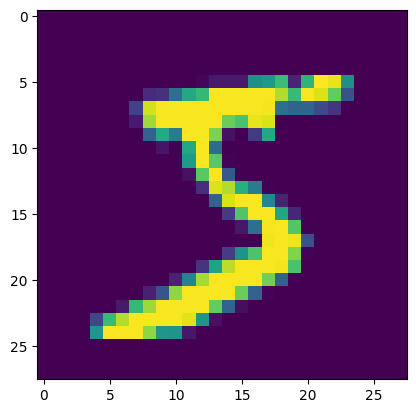

In [2]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

x_train=x_train.astype('float32')/255
x_test=x_test.astype('float32')/255

plt.imshow(x_train[0])

print(x_train.shape)

print(x_train.reshape((len(x_train),np.prod(x_train.shape[1:]))).shape)

x_train=x_train.reshape((len(x_train),np.prod(x_train.shape[1:])))
x_test=x_test.reshape((len(x_test),np.prod(x_test.shape[1:])))

In [3]:
## Dimensión del espacio de codificación

encoding_dim=16

## Entrada del codificador
input_img=Input(shape=(784,))

## Capa de codificación de una a la salida
encoded = Dense(128,activation='relu')(input_img)
encoded = Dense(64,activation='relu')(encoded)
encoded = Dense(encoding_dim,activation='relu')(encoded)

### Capa de decodificación
decoded = Dense(64,activation='relu')(encoded)
decoded = Dense(128,activation='relu')(decoded)
decoded = Dense(784,activation='sigmoid')(decoded)


### Modelo del autoencoder
autoencoder = Model(input_img,decoded)

### Modelo del codificador
encoder=Model(input_img,encoded)

### Modelo del decodificador
encoded_input=Input(shape=(encoding_dim,))
decoder_layer_1=autoencoder.layers[-3](encoded_input)
decoder_layer_2=autoencoder.layers[-2](decoder_layer_1)
decoder_layer_3=autoencoder.layers[-1](decoder_layer_2)

decoder=Model(encoded_input,decoder_layer_3)




In [4]:
### Compilar el modelo

autoencoder.compile(optimizer='adam',loss='binary_crossentropy')

In [5]:
encoder.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 16)                1040      
                                                                 
Total params: 109776 (428.81 KB)
Trainable params: 109776 (428.81 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [6]:
encoder.weights

[<tf.Variable 'dense/kernel:0' shape=(784, 128) dtype=float32, numpy=
 array([[-0.03768911,  0.06564616, -0.01205262, ...,  0.06715492,
         -0.02324682, -0.05520522],
        [-0.02973972,  0.03034879,  0.03422831, ..., -0.01209962,
          0.0503941 ,  0.02675845],
        [-0.06381118,  0.03486159,  0.00795146, ...,  0.05699877,
         -0.04128085, -0.05194215],
        ...,
        [-0.0464655 , -0.04053996, -0.0776035 , ..., -0.01125795,
          0.02375016,  0.05347612],
        [ 0.06903937,  0.0474151 , -0.02288198, ...,  0.04335342,
          0.01755655, -0.08029453],
        [-0.06383143, -0.04173278,  0.01324265, ...,  0.030438  ,
          0.05416676,  0.0658165 ]], dtype=float32)>,
 <tf.Variable 'dense/bias:0' shape=(128,) dtype=float32, numpy=
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,

In [7]:
autoencoder.fit(x_train,x_train,
                epochs=100,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test,x_test))


Epoch 1/100



235/235 [==============================] - 2s 5ms/step - loss: 0.2621 - val_loss: 0.1799
Epoch 2/100
235/235 [==============================] - 1s 5ms/step - loss: 0.1615 - val_loss: 0.1482
Epoch 3/100
235/235 [==============================] - 1s 5ms/step - loss: 0.1407 - val_loss: 0.1335
Epoch 4/100
235/235 [==============================] - 1s 6ms/step - loss: 0.1313 - val_loss: 0.1266
Epoch 5/100
235/235 [==============================] - 1s 5ms/step - loss: 0.1261 - val_loss: 0.1230
Epoch 6/100
235/235 [==============================] - 1s 5ms/step - loss: 0.1231 - val_loss: 0.1209
Epoch 7/100
235/235 [==============================] - 1s 5ms/step - loss: 0.1209 - val_loss: 0.1186
Epoch 8/100
235/235 [==============================] - 1s 6ms/step - loss: 0.1190 - val_loss: 0.1169
Epoch 9/100
235/235 [==============================] - 1s 6ms/step - loss: 0.1173 - val_loss: 0.1155
Epoch 10/100
235/235 [==============================] - 2s 7ms/step - loss: 0.1157 - val_loss: 0.1135
E

In [8]:
encoder.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 16)                1040      
                                                                 
Total params: 109776 (428.81 KB)
Trainable params: 109776 (428.81 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


313/313 [==============================] - 0s 1ms/step


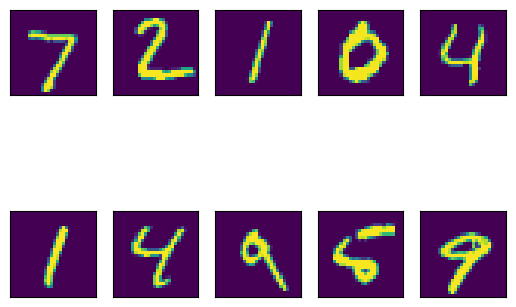

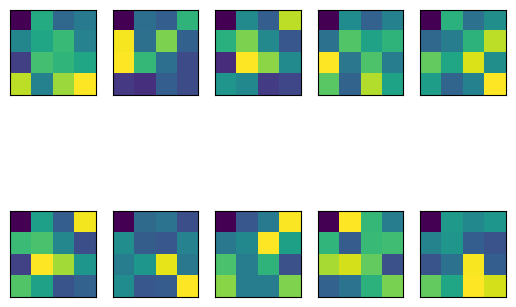

In [9]:
encoder_imgs=encoder.predict(x_test)
decoded_imgs=decoder.predict(encoder_imgs)

n=10
fig, axs = plt.subplots(2, 5)
for i in range(n):
    fil=i//5
    col=i%5
    axs[fil,col].imshow(x_test[i].reshape(28,28))
    axs[fil,col].get_xaxis().set_visible(False)
    axs[fil,col].get_yaxis().set_visible(False)


n=10
fig, axs = plt.subplots(2, 5)
for i in range(n):
    fil=i//5
    col=i%5
    axs[fil,col].imshow(encoder_imgs[i].reshape(4,4))
    axs[fil,col].get_xaxis().set_visible(False)
    axs[fil,col].get_yaxis().set_visible(False)

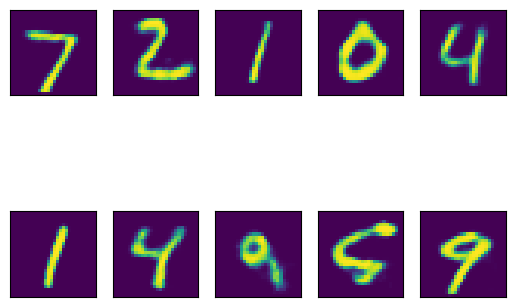

In [10]:
n=10
fig, axs = plt.subplots(2, 5)
for i in range(n):
    fil=i//5
    col=i%5
    axs[fil,col].imshow(decoded_imgs[i].reshape(28,28))
    axs[fil,col].get_xaxis().set_visible(False)
    axs[fil,col].get_yaxis().set_visible(False)